In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import math
import os
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer

# I. Data Organization 

## A. Importing and Cleaning Census Data

### 1990-1999

In [44]:
# We clean the data separately by decades due to differing formats
first_decade = "Data 1990-2000"

first_df = pd.DataFrame()
for f in os.listdir(first_decade):
    if ".csv" in f:
        # Importing and cleaning
        temp = pd.read_csv("Data 1990-2000/" + f)
        temp.columns = ['County', 'State', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', 'True 2000']
        temp = pd.DataFrame.dropna(temp)
        first_df = pd.concat([first_df, temp], axis=0)

# Adding data to original 
first_df["True 1990"] = ''
true_1990 = pd.read_excel("ExtraData/cnty1990.xls")
for index, row in true_1990.iterrows():
    cnty = row["CNTY_NAME,C,32"]
    state = row['STATE_NAME,C,25']
    pop = row["Population"]
    idx = first_df.index[(first_df['County'] == cnty) & (first_df["State"] == state)].to_list()
    if idx != []:
        first_df.at[idx[0], "True 1990"] = pop


# Cleaning Joined Dataframe
first_df = first_df[first_df.State != "State"]
first_df = first_df.reset_index(drop = True)
first_df


,County,State,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,True 2000,True 1990
0,Albany,Wyoming,"30,797","30,879","31,285","31,566","32,227","32,526","32,742","32,879","32,264","32,179","32,192","32,014",30797
1,Big Horn,Wyoming,"10,525","10,487","10,582","10,708","10,770","10,950","11,228","11,334","11,255","11,520","11,480","11,461",10525
2,Campbell,Wyoming,"29,370","29,403","29,826","30,517","30,544","30,835","31,440","31,946","32,098","32,452","32,844","33,698",29370
3,Carbon,Wyoming,"16,659","16,608","16,406","16,149","16,282","16,150","16,174","16,091","15,914","15,757","15,730","15,639",16659
4,Converse,Wyoming,"11,128","11,069","11,081","11,277","11,436","11,492","11,713","11,856","12,011","11,911","11,993","12,052",11128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Utah,Utah,"263,590","264,893","273,039","283,969","295,863","308,441","318,391","330,454","340,416","353,365","361,631","368,536",20150
3137,Wasatch,Utah,"10,089","10,150","10,488","10,790","11,183","11,723","12,143","12,740","13,316","13,953","14,577","15,215",6153
3138,Washington,Utah,"48,560","49,183","52,811","56,349","60,656","66,493","72,261","77,647","81,520","84,837","88,049","90,354",16588
3139,Wayne,Utah,"2,177","2,190","2,202","2,141","2,236","2,284","2,355","2,421","2,442","2,413","2,442","2,509",67783


### 2000-2009

In [45]:
second_decade = "Data 2000-2010"

second_df = pd.DataFrame()
for f in os.listdir(second_decade):
    if ".xls" in f:
        # Importing and cleaning
        temp = pd.read_excel("Data 2000-2010/" + f)
        state = temp.loc[3]["table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)"]
        temp = temp[4:]
        new_temp = pd.DataFrame(columns=['County', 'State', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 'True 2010'])
        new_temp["County"] = temp["table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)"]
        new_temp['County'] = new_temp['County'].map(lambda x: x.lstrip('.'))
        new_temp["State"] = state
        change_dict = {'Unnamed: 1': "2000", 'Unnamed: 2': "True 2000", 'Unnamed: 3': "2001", 'Unnamed: 4': "2002", 'Unnamed: 5':"2003",
            'Unnamed: 6': "2004", 'Unnamed: 7': "2005", 'Unnamed: 8': "2006", 'Unnamed: 9': "2007", 'Unnamed: 10': "2008",
            'Unnamed: 11': "2009", 'Unnamed: 12': "2010", 'Unnamed: 13': "True 2010"} 
        # Made a dictionary to help translate columns from raw to clean df
        for key, item in change_dict.items():
            new_temp[item] = temp[key]
        
        # Aggregating dataframe
        new_temp = pd.DataFrame.dropna(new_temp)
        second_df = pd.concat([second_df, new_temp], axis=0)
second_df = second_df.reset_index(drop = True)

second_df

,County,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,True 2010,True 2000
0,Beaver County,Utah,5997,5999.0,6058.0,6039.0,6077.0,6192.0,6281.0,6266.0,6413.0,6552.0,6629,6643,5998
1,Box Elder County,Utah,42755,43362.0,44038.0,44548.0,44666.0,45090.0,45948.0,47193.0,48437.0,49372.0,49975,50155,42882
2,Cache County,Utah,91389,92831.0,95493.0,97101.0,98854.0,100501.0,101236.0,103624.0,106824.0,110291.0,112656,113417,91861
3,Carbon County,Utah,20531,19937.0,20114.0,20146.0,20026.0,19870.0,20072.0,20554.0,20596.0,21143.0,21403,21462,20491
4,Daggett County,Utah,918,929.0,907.0,914.0,952.0,967.0,984.0,974.0,993.0,1037.0,1059,1063,926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,Washington County,Indiana,27204,27484.0,27674.0,27736.0,27854.0,27893.0,28164.0,28236.0,28298.0,28144.0,28262,28290,27247
3139,Wayne County,Indiana,71087,70712.0,70545.0,70490.0,70070.0,69793.0,69642.0,69365.0,69093.0,68984.0,68917,68853,71033
3140,Wells County,Indiana,27626,27626.0,27745.0,27803.0,27826.0,27820.0,27872.0,27836.0,27751.0,27620.0,27636,27642,27619
3141,White County,Indiana,25264,25351.0,25240.0,25060.0,24976.0,24861.0,24830.0,24762.0,24871.0,24573.0,24643,24635,25246


### 2010-2019

In [46]:
third_decade = pd.read_excel("Data2010-2019.xlsx")
true_2020 = pd.read_excel("ExtraData/cnty2020-2022.xlsx")
actual_2020 = pd.read_csv("ExtraData/True 2020.csv", encoding='latin1')
third_decade = third_decade.dropna()
true_2020 = true_2020.dropna()
actual_2020 = actual_2020.dropna()

# Making a dictionary to aid with cleaning the columns 
change_dict2 = {'table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)': 'County', 'Unnamed: 2': "2010", 
            'Unnamed: 3': "True 2010", 'Unnamed: 4': "2011", 'Unnamed: 5': "2012", 'Unnamed: 6':"2013",
            'Unnamed: 7': "2014", 'Unnamed: 8': "2015", 'Unnamed: 9': "2016", 'Unnamed: 10': "2017", 'Unnamed: 11': "2018",'Unnamed: 12': "2019"} 
third_df = pd.DataFrame(columns=['County', 'State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', "2020", "True 2020", "True 2010"])

# Some minor cleaning adjustments and formatting
for key, item in change_dict2.items():
     third_df[item] = third_decade[key]
third_df["2020"] = true_2020["Unnamed: 2"]
third_df["True 2020"] = actual_2020["True 2020"]
third_df = third_df[1:]
third_df = third_df.reset_index(drop = True)
third_df['County'] = third_df['County'].map(lambda x: x.lstrip('.'))

# Fixing specific county, state formatting and putting it in separate columns
for index, row in third_df.iterrows():
     item = row["County"]
     words = item.split(",")
     third_df.loc[index, "State"] = words[1]
     third_df.loc[index, "County"] = words[0]

third_df

,County,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,True 2020,True 2010
0,Autauga County,Alabama,54597,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0,58902,59134,54773
1,Baldwin County,Alabama,182265,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0,233219,10357,183112
2,Barbour County,Alabama,27455,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0,24960,19051,27327
3,Bibb County,Alabama,22915,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0,22183,116441,22870
4,Blount County,Alabama,57322,57560.0,57580.0,57619.0,57526.0,57526.0,57494.0,57787.0,57771.0,57826.0,59102,34772,57376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,Wyoming,43806,43986.0,45002.0,45157.0,44948.0,44719.0,44222.0,43464.0,42858.0,42343.0,31005,7685,43574
3138,Teton County,Wyoming,21298,21414.0,21624.0,22315.0,22773.0,23047.0,23234.0,23384.0,23269.0,23464.0,8738,6838,21296
3139,Uinta County,Wyoming,21121,20896.0,20996.0,20951.0,20822.0,20763.0,20682.0,20431.0,20292.0,20226.0,42190,18020,21089
3140,Washakie County,Wyoming,8528,8449.0,8409.0,8413.0,8273.0,8278.0,8165.0,8010.0,7877.0,7805.0,23377,38136,8530


## B. Extrapolating Census Prediction Trend to Real Trend and Calculating Census Shock Instrument

### Extrapolation

In [47]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
X = [float(i) for i in X]

# We use quadratic growth as the theoretical model for population growth in the short run as we have observed something similar in the trend
# This equation will account for possible linear trends by vanishing the coefficient on the squared term

# Function that extrapolates the population growth trend per county
def extrapolate_trend(data, decade):
    actual_data = pd.DataFrame(columns=(data.columns))
    working_data = data.iloc[:,2:12]
    if decade == "first":
        yr = 2000
        
    elif decade == "second":
        yr = 2010
    else:
        yr = 2020
    date = "True " + str(yr)
    for index,row in working_data.iterrows():
        num_row = extrapolate_row(row, data.iloc[index][date])
        new_df = pd.DataFrame([{"County": data.iloc[index]["County"], "State": data.iloc[index]["State"], str(yr - 10): num_row[0], str(yr - 9): num_row[1],
                           str(yr - 8): num_row[2], str(yr - 7): num_row[3], str(yr - 6): num_row[4], str(yr - 5): num_row[5],
                            str(yr - 4): num_row[6], str(yr - 3): num_row[7], str(yr - 2): num_row[8], str(yr - 1): num_row[9]}])
        actual_data = pd.concat([actual_data, new_df])
    return actual_data
    
        
# Helper function for above, calculates per row
def extrapolate_row(row, start):
    if type(start) == str:
        start = start.replace(",", "")
    start = float(start)
    for i, val in enumerate(row):
        if type(val) == str:
            new = val.replace(",", "")
            row[i] = float(new)
    row = np.float64(row)
    predicted_actual = []
    poly = np.polyfit(X, row, 2)
    
    for x in X:
        y = x*x*poly[0] + x*poly[1] + start
        predicted_actual.append(y)
    return predicted_actual


In [48]:
# Stores calculated extrapolation trends
extrap_first = extrapolate_trend(first_df, "first").reset_index(drop = True)
extrap_sec = extrapolate_trend(second_df, "second").reset_index(drop = True)
extrap_third = extrapolate_trend(third_df, "third").reset_index(drop = True)

### Calculating Census Shocks

In [49]:
# Main function that creates dataframe with all census shocks for each county
def calculate_census_shock(first, second, third, estimated_first, estimated_sec, estimated_third):
    census_shocks = pd.DataFrame(columns=['County', 'State', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                                          '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
                                          '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', "2020"])
    census_shocks["County"] = first["County"]
    census_shocks["State"] = first["State"]
    census_shocks.reset_index(drop = True)
    # Iterates through first decade
    for i, row in first.iterrows():
        for j in range(2, len(row)-2):
            yr = 1990 + j - 2
            true = estimated_first.iloc[i][str(yr)]
            estim = first.iloc[i][str(yr)]
            if true == 0 or estim == 0:
                print(true, estim, curr_cnty)
            true = str_to_float(true); estim = str_to_float(estim)
            shock = math.log(true) - math.log(estim) # log difference between actual and estimated
            census_shocks[str(yr)].iloc[i] = shock
        true_end = first.iloc[i]["True 2000"]; true_end = str_to_float(true_end)
        estim_end = first.iloc[i]["2000"]; estim_end = str_to_float(estim_end)
        end_shock = math.log(true_end) - math.log(estim_end) # Calculates shock at end of decade
        census_shocks["2000"].iloc[i] = end_shock

    # Now second decade, very similar, a helper function is possible here to make more concise, but this is easier to follow
    for _, row in second.iterrows():
        curr_cnty = (row["County"].split(" "))[0]
        curr_st = row["State"].replace(" ", "")
        idx = census_shocks.index[(census_shocks['County'] == curr_cnty) & (census_shocks["State"] == curr_st)].tolist() # Gets index of correct county
        if idx == []:
            continue
        else:
            idx = idx[0]
        for j in range(2, len(row)-2):
            yr = 2000 + j - 2
            true = estimated_sec.iloc[idx][str(yr)]
            estim = second.iloc[idx][str(yr)]
            true = str_to_float(true); estim = str_to_float(estim)
            try:
                shock = math.log(true) - math.log(estim) # log difference between actual and estimated
            except:
                continue
            shock = math.log(true) - math.log(estim) # log difference between actual and estimated
            census_shocks[str(yr)].iloc[idx] = shock
        true_end = second.iloc[idx]["True 2010"]; true_end = str_to_float(true_end)
        estim_end = second.iloc[idx]["2010"]; estim_end = str_to_float(estim_end)
        end_shock = math.log(true_end) - math.log(estim_end) # Calculates shock at end of decade
        census_shocks["2010"].iloc[idx] = end_shock

    # Last decade
    for _, row in third.iterrows():
        curr_cnty = (row["County"].split(" "))[0]
        curr_st = row["State"].replace(" ", "")
        idx2 = census_shocks.index[(census_shocks['County'] == curr_cnty) & (census_shocks["State"] == curr_st)].tolist() # Gets index of correct county
        if idx2 == []:
            continue
        else:
            idx2 = idx2[0]
        for j in range(2, len(row)-2):
            yr = 2010 + j - 2
            true = estimated_third.iloc[idx2][str(yr)]
            estim = third.iloc[idx2][str(yr)]
            true = str_to_float(true); estim = str_to_float(estim)
            try:
                shock = math.log(true) - math.log(estim) # log difference between actual and estimated
            except:
                continue
            census_shocks[str(yr)].iloc[idx2] = shock
        true_end = third.iloc[idx2]["True 2020"]; true_end = str_to_float(true_end)
        estim_end = third.iloc[idx2]["2020"]; estim_end = str_to_float(estim_end)
        end_shock = math.log(true_end) - math.log(estim_end) # Calculates shock at end of decade
        census_shocks["2020"].iloc[idx2] = end_shock
    
    return census_shocks

# Helper to change str to float
def str_to_float(num):
    if type(num) == str:
        num = num.replace(",", "")
    num = float(num)
    return num

In [50]:
census_shocks_df = calculate_census_shock(first_df, second_df, third_df, extrap_first, extrap_sec, extrap_third)
census_shocks_df = census_shocks_df.dropna()
census_shocks_df.reset_index(drop = True)

,County,State,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Albany,Wyoming,0.038756,0.053684,0.055167,0.057858,0.045952,0.042793,0.039557,0.036099,...,0.067546,0.072339,0.07696,0.075059,0.077356,0.07288,0.073265,0.074358,0.072618,0.003931
1,Campbell,Wyoming,0.137465,0.146432,0.142309,0.129632,0.139039,0.139908,0.130887,0.125385,...,-0.370521,-0.375755,-0.381094,-0.390697,-0.391869,-0.395257,-0.394397,-0.410728,-0.434309,-0.270155
2,Carbon,Wyoming,-0.063183,-0.066468,-0.060453,-0.050755,-0.064913,-0.062592,-0.069757,-0.070149,...,1.632361,1.635186,1.641108,1.639216,1.638237,1.637018,1.63835,1.646304,1.644973,1.658058
3,Converse,Wyoming,0.079766,0.092599,0.099457,0.090278,0.085033,0.089297,0.079776,0.077538,...,-0.503407,-0.503008,-0.5028,-0.500163,-0.499005,-0.497153,-0.500805,-0.498962,-0.498213,-0.530452
4,Crook,Wyoming,0.106172,0.11519,0.123707,0.118304,0.124565,0.096718,0.104872,0.095001,...,0.846577,0.849795,0.851881,0.837795,0.859397,0.857048,0.874319,0.871036,0.874721,0.88596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,Utah,Utah,0.335144,0.351636,0.343985,0.328498,0.312263,0.296371,0.291223,0.281411,...,0.695336,0.665236,0.691966,0.691504,0.698874,0.701432,0.721416,0.71153,0.703284,0.862507
2438,Wasatch,Utah,0.410836,0.418705,0.403296,0.395528,0.383441,0.362815,0.356756,0.340271,...,-1.67481,-1.653902,-1.636486,-1.632485,-1.649551,-1.683571,-1.737786,-1.827536,-1.962216,-1.394878
2439,Washington,Utah,0.620935,0.644162,0.610594,0.584759,0.551309,0.500633,0.459463,0.430242,...,-1.073629,-1.026609,-1.010842,-0.992326,-0.972972,-0.95661,-0.945001,-0.928093,-0.930313,-0.245186
2440,Wayne,Utah,0.141936,0.142263,0.144865,0.182769,0.150857,0.142754,0.126846,0.115408,...,-0.149736,-0.157106,-0.158498,-0.15681,-0.159426,-0.161952,-0.157175,-0.158803,-0.165047,-0.850701


## C. Importing Cleaned Data for Well-Being Measures

In [51]:
# Eva has cleaned the data sets, so we just have to call the excel sheets to get the cleaning
mhh_df = pd.read_excel("WellBeingData/MHH_ALL_COMBINED.xlsx")
mort_df = pd.read_csv("WellBeingData/updated_mortality.csv")
gov_spend = pd.read_csv("WellBeingData/govt_spending_data.csv")


mhh_years = [3,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29] # We don't have data for all years, but most, we get the rest by linear regression
mort_years = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
mort_cols = ['Mortality Rate, 1990*','Mortality Rate, 1991*', 'Mortality Rate, 1992*', 'Mortality Rate, 1993*', 'Mortality Rate, 1994*',
       'Mortality Rate, 1995*','Mortality Rate, 1996*', 'Mortality Rate, 1997*', 'Mortality Rate, 1998*', 'Mortality Rate, 1999*',
       'Mortality Rate, 2000*','Mortality Rate, 2001*', 'Mortality Rate, 2002*','Mortality Rate, 2003*', 'Mortality Rate, 2004*',
       'Mortality Rate, 2005*', 'Mortality Rate, 2006*', 'Mortality Rate, 2007*', 'Mortality Rate, 2008*', 'Mortality Rate, 2009*',
       'Mortality Rate, 2010*', 'Mortality Rate, 2011*', 'Mortality Rate, 2012*','Mortality Rate, 2013*','Mortality Rate, 2014*']
mhh_cols = ['Median Household Income 1993', 'Median Household Income 1995', 'Median Household Income 1997',
       'Median Household Income 1998', 'Median Household Income 1999',
       'Median Household Income 2000', 'Median Household Income 2001',
       'Median Household Income 2002', 'Median Household Income 2003',
       'Median Household Income 2004', 'Median Household Income 2005',
       'Median Household Income 2006', 'Median Household Income 2007',
       'Median Household Income 2008', 'Median Household Income 2009',
       'Median Household Income 2010', 'Median Household Income 2011',
       'Median Household Income 2012', 'Median Household Income 2013',
       'Median Household Income 2014', 'Median Household Income 2015',
       'Median Household Income 2016', 'Median Household Income 2017',
       'Median Household Income 2018', 'Median Household Income 2019']


# Function to do linear regression that will calculate missing data points
def linear_reg_for_data(dataset):
    if dataset == "mhh":
        data = mhh_df[mhh_cols]
        col_1990 = []; col_1991 = []
        col_1992 = []; col_2020 = []
        col_1994 = []; col_1996 = []
        for i, row in data.iterrows():
            for j, elem in enumerate(row):
                if elem == ".":
                    elem = 0.0
                elif type(elem) == str:
                    elem = elem.split(".")[0]
                row[j] = float(elem)
            row = row.astype(float)
            reg = linregress(mhh_years, row)
            col_2020.append(reg.slope*30 + reg.intercept)
            col_1996.append(reg.slope*6 + reg.intercept)
            col_1994.append(reg.slope*4 + reg.intercept)
            col_1992.append(reg.slope*2 + reg.intercept)
            col_1991.append(reg.slope + reg.intercept)
            col_1990.append(reg.intercept)
        mhh_df["Median Household Income 2020"] = col_2020
        mhh_df["Median Household Income 1990"] = col_1990
        mhh_df["Median Household Income 1991"] = col_1991
        mhh_df["Median Household Income 1992"] = col_1992
        mhh_df["Median Household Income 1994"] = col_1994
        mhh_df["Median Household Income 1996"] = col_1996
    else:
       data2 = mort_df[mort_cols]
       col_2015 = []; col_2016 = []
       col_2017 = []; col_2018 = []
       col_2019 = []; col_2020 = []
       for i, row in data2.iterrows():
           reg = linregress(mort_years, row)
           col_2020.append(reg.slope*30 + reg.intercept)
           col_2019.append(reg.slope*29 + reg.intercept)
           col_2018.append(reg.slope*28 + reg.intercept)
           col_2017.append(reg.slope*27 + reg.intercept)
           col_2016.append(reg.slope*26 + reg.intercept)
           col_2015.append(reg.slope*25 + reg.intercept)
       mort_df['Mortality Rate, 2020*'] = col_2020
       mort_df['Mortality Rate, 2019*'] = col_2019
       mort_df['Mortality Rate, 2018*'] = col_2018
       mort_df['Mortality Rate, 2017*'] = col_2017
       mort_df['Mortality Rate, 2016*'] = col_2016
       mort_df['Mortality Rate, 2015*'] = col_2015
linear_reg_for_data("mort")
linear_reg_for_data("mhh")

states = ["Alabama","Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia"
          , "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota",
             "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", 
              "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", 
              "Washington", "West Virginia", "Wisconsin", "Wyoming"]
counties = []
stats = []
for i, row in gov_spend.iterrows():
    cnty = ((row["Name"].split(" "))[0]).title()
    st = row["State_Code"]
    state = states[st - 1]
    counties.append(cnty)
    stats.append(state)
gov_spend["State"] = stats
gov_spend["County"] = counties
gov_spend.drop(["GOVSid","FIPSid","Type_Code","YearPop","Unnamed: 0","GOVSid", "Name"], axis = 1, inplace=True)
gov_spend.reset_index(drop = True, inplace=True)




In [52]:
# More table organizing
mort_df.dropna(inplace=True)
mhh_df.dropna(inplace=True)

cties = []
sts = []
for i, row in mort_df.iterrows():
    loc = row["Location"]
    if "County" in loc:
        c, s = loc.split(",")
        s = s.replace(" ", "")
        c = c.split(" ")[0]
        cties.append(c)
        sts.append(s)
    else:
        cties.append(pd.NA)
        sts.append(pd.NA)
mort_df["County"] = cties
mort_df["State"] = sts

# Even more table organization
us_state_to_abbrev = {"Alabama": "AL","Alaska": "AK","Arizona": "AZ","Arkansas": "AR","California": "CA",
    "Colorado": "CO","Connecticut": "CT","Delaware": "DE","Florida": "FL", "Georgia": "GA","Hawaii": "HI",
    "Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME","Maryland": "MD", "Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS",
    "Missouri": "MO","Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY",
    "North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI",
    "South Carolina": "SC","South Dakota": "SD","Tennessee": "TN", "Texas": "TX","Utah": "UT", "Vermont": "VT","Virginia": "VA",
    "Washington": "WA","West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY", "District of Columbia": "DC"}
mhh_df["County"] = ""
mhh_df["State"] = ""
cs = []
ss = []
for i, row in mhh_df.iterrows():
    loc = row["Name"]
    if "County" in loc:
        c1 = loc.split(" ")[0]
        postal = row["Postal Code"]
        cs.append(c1)
        s1 = list(us_state_to_abbrev.keys())[list(us_state_to_abbrev.values()).index(str(postal))]
        ss.append(s1)
    else:
        cs.append(pd.NA)
        ss.append(pd.NA)
mhh_df["County"] = cs
mhh_df["State"] = ss


gov_spend["Census_Shock"] = ""
gov_spend["Mortality"] = ""
gov_spend["Median_Income"] = ""
shocks = []
mort = []
inc = []
for i, row in gov_spend.iterrows():
    yr = row["Year4"]
    if 1990 <= yr and yr <= 2020:
        cty = row["County"]
        state = row["State"]
        mask = census_shocks_df[(census_shocks_df["County"] == cty)&(census_shocks_df["State"] == state)]
        shock = mask[str(yr)].values
        mask2 = mort_df[(mort_df["County"] == cty)&(mort_df["State"] == state)]
        mrt = (mask2["Mortality Rate, " + str(yr) + "*"].values).astype(float)
        mask3 = mhh_df[(mhh_df["County"] == cty)&(mhh_df["State"] == state)]
        mhh = (mask3["Median Household Income " + str(yr)].values).astype(float)
        shocks.append(shock)
        if mrt.size != 0:
            mort.append(mrt[0])
        else:
            mort.append(pd.NA)
        if mhh.size != 0:
            inc.append(mhh[0])
        else:
            inc.append(pd.NA)
    else:
        shocks.append(pd.NA)
        mort.append(pd.NA)
        inc.append(pd.NA)

gov_spend["Census_Shock"] = shocks
gov_spend["Mortality"] = mort
gov_spend["Median_Income"] = inc


In [53]:
gov_spend.dropna(inplace=True)

# II. Regression and Empirics

## A. Running 2SLS

First Stage

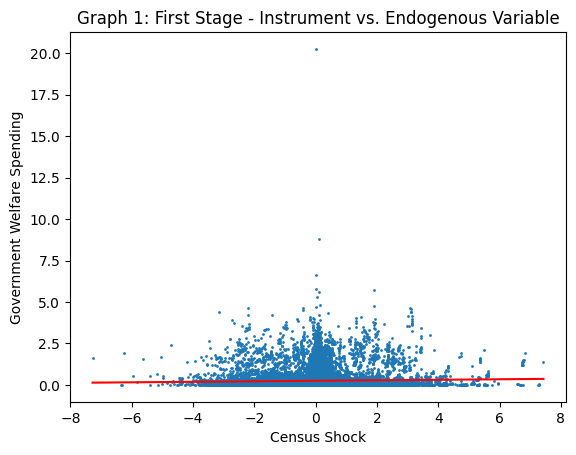

In [91]:
# Getting instrument and X
gov_spend.dropna(inplace=True)
new_gov = gov_spend[(gov_spend["IG_Exp_To_Local_Govts"] <= 150000)] # Removing counties with over 50000 in spending, some outliers in our data set
instrument = new_gov["Census_Shock"]
final_instrument = []
indices = instrument.index
new_indices = []
for i in indices:
    try:
        final_instrument.append(instrument[i][0])
        new_indices.append(i)
    except:
        pass
endogenous_gov = new_gov.loc[new_indices, "IG_Exp_To_Local_Govts"]
endogenous_gov = [float(i) for i in endogenous_gov]

# Running regression and plotting
first_stage = linregress(final_instrument, endogenous_gov)
plt.scatter(final_instrument, endogenous_gov, s= 1)
plt.xlabel("Census Shock")
plt.ylabel("Government Welfare Spending")
plt.title("Graph 1: First Stage - Instrument vs. Endogenous Variable")
plt.plot(np.unique(final_instrument), np.poly1d(np.polyfit(final_instrument, endogenous_gov, 1))(np.unique(final_instrument)), color = "Red")
plt.show()
    

Second Stage

Total Local Government Revenue

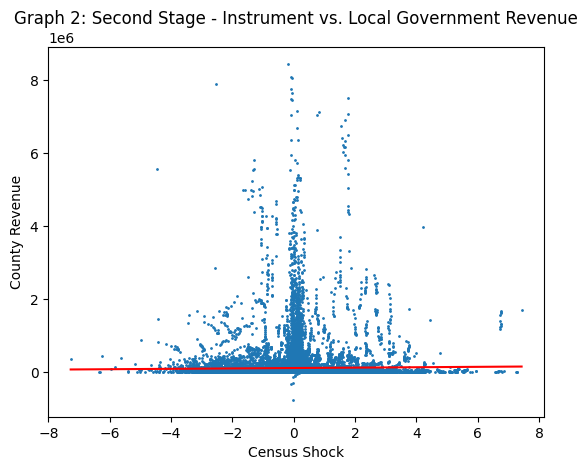

In [92]:
revs = new_gov.loc[new_indices, "Total_Revenue"]
revs = [float(i) for i in revs]

# Running regression and plotting for Government Revenue
first_stage = linregress(final_instrument, revs)
plt.scatter(final_instrument, revs, s= 1)
plt.xlabel("Census Shock")
plt.ylabel("County Revenue")
plt.title("Graph 2: Second Stage - Instrument vs. Local Government Revenue")
plt.plot(np.unique(final_instrument), np.poly1d(np.polyfit(final_instrument, revs, 1))(np.unique(final_instrument)), color = "Red")
plt.show()


Median Household Income

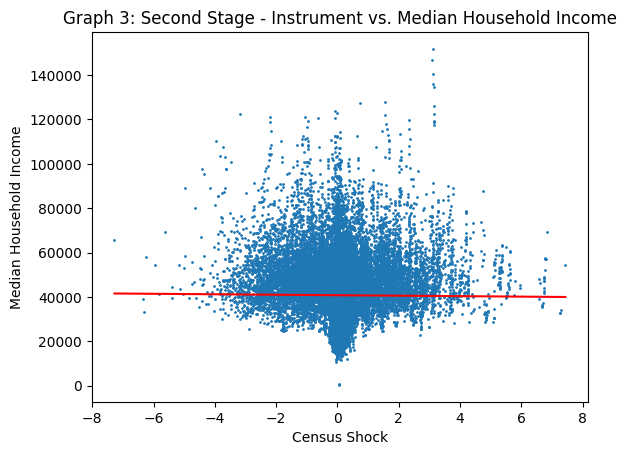

In [93]:
incs = new_gov.loc[new_indices, "Median_Income"]
incs = [float(i) for i in incs]

# Running regression and plotting for Median Household Income
first_stage = linregress(final_instrument, incs)
plt.scatter(final_instrument, incs, s= 1)
plt.xlabel("Census Shock")
plt.ylabel("Median Household Income")
plt.title("Graph 3: Second Stage - Instrument vs. Median Household Income")
plt.plot(np.unique(final_instrument), np.poly1d(np.polyfit(final_instrument, incs, 1))(np.unique(final_instrument)), color = "Red")
plt.show()

Mortality

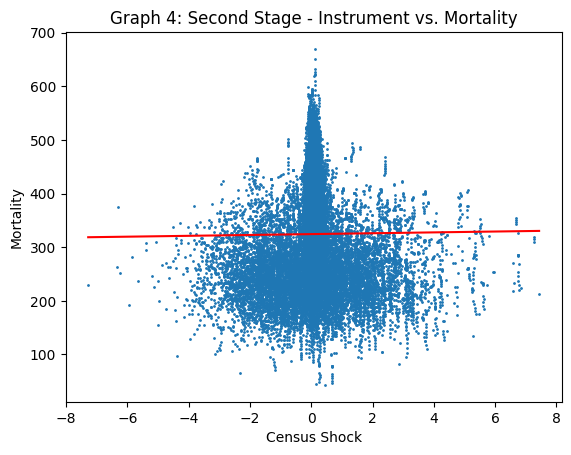

In [94]:
morts = new_gov.loc[new_indices, "Mortality"]
morts = [float(i) for i in morts]

# Running regression and plotting for Mortality
first_stage = linregress(final_instrument, morts)
plt.scatter(final_instrument, morts, s= 1)
plt.xlabel("Census Shock")
plt.ylabel("Mortality")
plt.title("Graph 4: Second Stage - Instrument vs. Mortality")
plt.plot(np.unique(final_instrument), np.poly1d(np.polyfit(final_instrument, morts, 1))(np.unique(final_instrument)), color = "Red")
plt.show()

Correlations

In [63]:
print("Revenue: ", np.corrcoef(final_instrument,revs)[0][1], "- MHI: ",np.corrcoef(final_instrument,incs)[0][1], "- and Mortality: ", np.corrcoef(final_instrument,morts)[0][1])
print("Government Welfare Spending: ", np.corrcoef(final_instrument,endogenous_gov)[0][1])

Revenue:  0.012730794529261662 - MHI:  -0.007419029416595011 - and Mortality:  0.008840745790708275
Government Welfare Spending:  0.029844877768257023


In [79]:
# Formats Tables
def star_table(x,y):
    #add constant to predictor variables
    x = sm.add_constant(x)

    #fit linear regression model
    model = sm.OLS(y, x).fit()

    stargazer = Stargazer([model])
    print(stargazer.render_latex())
